In [2]:
include("voiConsAuc.jl")

INFO: Precompiling module Distributions.
INFO: Precompiling module Optim.
INFO: Precompiling module RCall.


R installation found at "/usr/lib/R"


evsi_plot (generic function with 3 methods)

In [3]:
function es(μ = [0, 0], σ = [1, 1])
    function g(n)
        f(p) = evsi_sim(μ, σ, [n * p, n * (1 - p)], nsims = 100000)
        vcat(map(f, 1:-.01:0)...)
    end
    hcat(map(g, exp(collect(linspace(log(1), log(50), 101))))...)
end

es (generic function with 3 methods)

In [4]:
x = es([0, 0], [1, 1])

101×101 Array{Float64,2}:
 0.281955  0.289732  0.286456  0.287867  …  0.397259  0.396471  0.395599
 0.281575  0.289487  0.291014  0.288996     0.456273  0.456126  0.454165
 0.280433  0.287504  0.288696  0.297403     0.48271   0.488409  0.48368 
 0.290785  0.295565  0.297436  0.299449     0.494685  0.502685  0.500933
 0.289304  0.293327  0.30051   0.300267     0.507549  0.513143  0.514805
 0.290699  0.291548  0.301898  0.299608  …  0.516495  0.524791  0.515029
 0.290452  0.295092  0.298992  0.300692     0.51878   0.524603  0.525274
 0.294808  0.301669  0.301997  0.307405     0.528453  0.527376  0.528031
 0.298665  0.301888  0.297685  0.303373     0.527839  0.53122   0.533882
 0.299791  0.301076  0.302454  0.312881     0.530334  0.537648  0.535627
 0.302782  0.304922  0.304802  0.311597  …  0.5364    0.53316   0.534011
 0.296754  0.305907  0.308258  0.308389     0.533193  0.536538  0.536606
 0.306423  0.308101  0.306213  0.312288     0.537874  0.539411  0.537727
 ⋮                       


Attaching package: ‘nlme’

The following object is masked from ‘package:raster’:

    getData

This is mgcv 1.8-15. For overview type 'help("mgcv-package")'.
 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in readbytes(::IOStream) at ./deprecated.jl:30
 in #30 at /home/wkmor1/.julia/v0.5/RCall/src/IJulia.jl:32 [inlined]
 in open(::RCall.##30#31{MIME

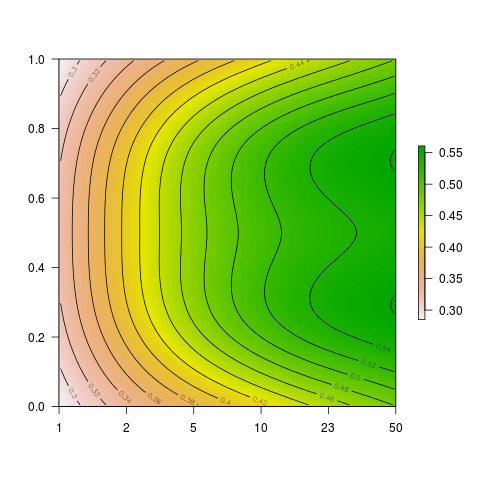

{Symbol("image/png")}}, ::String) at ./iostream.jl:113
 in ijulia_displayfile(::MIME{Symbol("image/png")}, ::String) at /home/wkmor1/.julia/v0.5/RCall/src/IJulia.jl:31
 in ijulia_displayplots() at /home/wkmor1/.julia/v0.5/RCall/src/IJulia.jl:58
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/wkmor1/.julia/v0.5/IJulia/src/execute_request.jl:188
 in eventloop(::ZMQ.Socket) at /home/wkmor1/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::IJulia.##9#15)() at ./task.jl:360
while loading /home/wkmor1/.julia/v0.4/IJulia/src/kernel.jl, in expression starting on line 31


RCall.RObject{RCall.RealSxp}
[1] 0.0 0.2 0.4 0.6 0.8 1.0


In [5]:
R"
    library(raster)
    library(mgcv)
    r = $x
    r = 
      data.frame(
        x = rep(seq_len(ncol(r)), each = nrow(r)),
        y = rep(seq_len(nrow(r)), times = ncol(r)),
        z = c(r)
      )
    r = gam(z ~ te(x, y), data = r)
    r = matrix(fitted(r), ncol = 101)
    #r = t(t(r) / apply(r, 2, max))
    r = raster(r)
    plot(r, asp = NA, las = 1, xaxt = 'n')
    contour(r, add = TRUE)
    axis(1, at = 0:5 / 5, label = round(exp(seq(log(1), log(50), length.out = 6))))
"

In [6]:
versioninfo()

Julia Version 0.5.0
Commit 3c9d753 (2016-09-19 18:14 UTC)
Platform Info:
  System: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU E5-2699 v3 @ 2.30GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Haswell)
  LAPACK: libopenblas64_
  LIBM: libopenlibm
  LLVM: libLLVM-3.7.1 (ORCJIT, haswell)
